<a href="https://colab.research.google.com/github/SERVIR/flood_mapping_intercomparison/blob/main/notebooks/Module_4_Sampling_Design.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

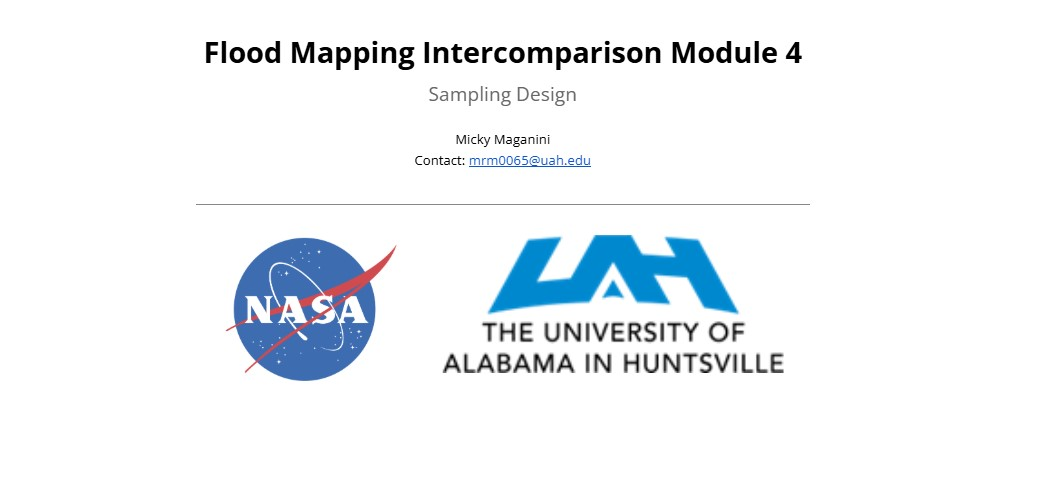

#**Introduction**
The goal of this notebook is to generate a set of point locations for our case study where we will validate the performance of each flood product/package based on high-resolution optical imagery. To do this, we need our flood maps from each product/package as well as our high-resolution optical imagery. We will conduct a clustered stratified sampling approach.

## Step 1: Clustering

Our first step is to cluster our area of interest. In this case, we will have one cluster that will consist of areas where **no** satellite has an obstructed view of the ground due to cloud cover, haze, or low quality data.


For our optical flood maps, each of these maps comes with a cloud or low data quality mask. In Module 6, we assigned all of the maps the common value of 2 for this unusable data. We also want to mask out areas where our high-res optical data from Planet has clouds. We can use the Usable Data Mask (UDM) that comes with Planet data for this purpose.

We will find the **union** of areas where each optical sensor has unusable data, and remove this union from the area of analysis.

## Step 2: Stratification

Stratification refers to the splitting of the area of interest into strata, which are groups of pixels that are both exhaustive and exlcusive. In other words, each pixel in the area of interest can be assigned to one and only one strata. In this case, we will use three classes of strata to investigate the performance of the flood products across various types of surface conditions. The three classes of strata we will use are land cover, elevation and slope


### Step 2 Part 1: Land Cover

We will use Google's Dynamic World Dataset [Brown et al 2022] to stratify the sampling area by Land Cover

### Step 2 Part 2: Product Output

We will use the output of the flood products themselves (i.e. water, nonwater) to evaluate the performance of the products by class.

# Step 1: Define input Variables


Change the input variables below to suit your needs

In [ ]:
# Google Earth Engine Directory
parent_directory = "users/mickymags/oct_cambodia/"

# Google Drive Folder, Make sure this ends in a slash
my_gdrive_folder = 'drive/My Drive/Flood_Intercomparison/Case_Studies/oct/oct_cambodia/'

# Date of Interest
doi = "2024-10-01"

# Flood Event Description
flood_event_desc='cambodia_oct'

# Google Earth Engine project
my_gee_project = 'servir-sco-assets'

# Step 2: Import packages

In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt

If you have not already installed geemap, uncomment the cell below.

In [ ]:
#!pip install geemap

Now that we have installed our packages, it's time to import them via import so we can use them in this notebook. Below you can find a brief description of what each package does.

The geemap package will allow us to visualize a Google Maps interface interactively within this notebook.
The ee package will allow us to run Earth Engine functions via the python programming language.

In [ ]:
import geemap
import ee

In order to continue running this script, you need to be associated with a Google Cloud Project. Now, we have to authenticate and initialize earth engine. After you run the code below, click through the pop-up window to login to the Google Account associated with your Google Earth Engine account. Click "Continue" until you have returned to this notebook and a green checkmark appears to the left of the code cell below.

In [ ]:
ee.Authenticate()
ee.Initialize(project = my_gee_project)

Import the Outputs from the previous modules:



*   The Planet Imagery Usable Data Masks
*   Each Flood Map



## MODIFIABLE VARIABLE ALERT

In [ ]:
aoi = ee.FeatureCollection(parent_directory + "aoi")
aoi_centroid = aoi.geometry().centroid()             # Get the center of the AOI
lon = aoi_centroid.coordinates().get(0).getInfo()    # Extract the longitude from the centroid
lat = aoi_centroid.coordinates().get(1).getInfo()    # Extract the latitude from the centroid

#Enter in the path to your planet imagery and Planet UDMS below. You can also use imagery other than Planet.

pl_rg1_pt1 = ee.Image(parent_directory + "reference_v2/planet_region1_8b_part1")
pl_rg1_pt2 = ee.Image(parent_directory + "reference_v2/planet_region1_8b_part2")
pl_rg1_pt3 = ee.Image(parent_directory + "reference_v2/planet_region1_8b_part3")
pl_rg2 = ee.Image(parent_directory + "reference_v2/planet_region2_8b")
pl_rg3 = ee.Image(parent_directory + "reference_v2/planet_region3_8b")

pl_mos = ee.ImageCollection([pl_rg1_pt1, pl_rg1_pt2, pl_rg1_pt3, pl_rg2, pl_rg3]).mosaic()

pl_udm_pt1 = ee.Image("users/mickymags/flood_intercomparison_chad_09_26_take2/reference_v2/pl_udm_pt1")
pl_udm_pt2 = ee.Image("users/mickymags/flood_intercomparison_chad_09_26_take2/reference_v2/pl_udm_pt2")
pl_udm_pt3 = ee.Image("users/mickymags/flood_intercomparison_chad_09_26_take2/reference_v2/pl_udm_pt3")
pl_udm_pt4 = ee.Image("users/mickymags/flood_intercomparison_chad_09_26_take2/reference_v2/pl_udm_pt4")
pl_udm_pt5 = ee.Image("users/mickymags/flood_intercomparison_chad_09_26_take2/reference_v2/pl_udm_pt5")
pl_udm_pt6 = ee.Image("users/mickymags/flood_intercomparison_chad_09_26_take2/reference_v2/pl_udm_pt6")
pl_udm_pt7 = ee.Image("users/mickymags/flood_intercomparison_chad_09_26_take2/reference_v2/pl_udm_pt7")
pl_udm_pt8 = ee.Image("users/mickymags/flood_intercomparison_chad_09_26_take2/reference_v2/pl_udm_pt8")
pl_udm_pt9 = ee.Image("users/mickymags/flood_intercomparison_chad_09_26_take2/reference_v2/pl_udm_pt9")
pl_udm_pt10 = ee.Image("users/mickymags/flood_intercomparison_chad_09_26_take2/reference_v2/pl_udm_pt10")
pl_udm_pt11 = ee.Image("users/mickymags/flood_intercomparison_chad_09_26_take2/reference_v2/pl_udm_pt11")
pl_udm_pt12 = ee.Image("users/mickymags/flood_intercomparison_chad_09_26_take2/reference_v2/pl_udm_pt12")
pl_udm_pt13 = ee.Image("users/mickymags/flood_intercomparison_chad_09_26_take2/reference_v2/pl_udm_pt13")
pl_udm_pt14 = ee.Image("users/mickymags/flood_intercomparison_chad_09_26_take2/reference_v2/pl_udm_pt14")
pl_udm_pt15 = ee.Image("users/mickymags/flood_intercomparison_chad_09_26_take2/reference_v2/pl_udm_pt15")
pl_udm_pt16 = ee.Image("users/mickymags/flood_intercomparison_chad_09_26_take2/reference_v2/pl_udm_pt16")
pl_udm_pt17 = ee.Image("users/mickymags/flood_intercomparison_chad_09_26_take2/reference_v2/pl_udm_pt17")
pl_udm_pt18 = ee.Image("users/mickymags/flood_intercomparison_chad_09_26_take2/reference_v2/pl_udm_pt18")
pl_udm_pt19 = ee.Image("users/mickymags/flood_intercomparison_chad_09_26_take2/reference_v2/pl_udm_pt19")
pl_udm_pt20 = ee.Image("users/mickymags/flood_intercomparison_chad_09_26_take2/reference_v2/pl_udm_pt20")

pl_udm_ic = ee.ImageCollection([pl_udm_pt1, pl_udm_pt2, pl_udm_pt3, pl_udm_pt4, pl_udm_pt5,
                                       pl_udm_pt6, pl_udm_pt7, pl_udm_pt8, pl_udm_pt9, pl_udm_pt10,
                                       pl_udm_pt11, pl_udm_pt12, pl_udm_pt13, pl_udm_pt14, pl_udm_pt15,
                                       pl_udm_pt16, pl_udm_pt17, pl_udm_pt18, pl_udm_pt19, pl_udm_pt20])

pl_udm_mosaic = pl_udm_ic.max()


# Reclassified VIIRS flood map we exported at the end of module 6
vfm = ee.Image(parent_directory + "vfm_harmonized")

# Reclassified GFM Flood Map we exported at the end of module 6
gfm = ee.Image(parent_directory + "gfm_harmonized")

# HYDRAFloods Map that we exported at the end of module X
hf = ee.Image(parent_directory + "hydrafloods_harmonized")

# HYDROSAR Map that we exported at the end of Module 6
hs = ee.Image(parent_directory + "hydrosar_harmonized")

# Reclassified MCDWD Flood Map we exported at the end of module 6
mcdwd = ee.Image(parent_directory + "mcdwd_harmonized")

# Reclassified DSWx-HLS Flood Map we exported at the end of module 6
dswxhls = ee.Image(parent_directory + "dswxhls_harmonized")

# Reclassified DSWx-S1 Flood Map we exported at the end of module 6
dswxs1 = ee.Image(parent_directory + "dswxs1_harmonized")

In [ ]:
my_projection = vfm.projection().getInfo()["crs"] # Get the common projection shared by all flood maps.

# Step 3: Stratification

We will conduct clustered stratified random sampling.

We will cluster our point sampling to locations where all optical sensors used in this project (e.g. Planet, VIIRS, MODIS, and HLS) have an unobstructed view of the ground (i.e. where no optical sensors have clouds or are otherwise masked).

We will conduct two stage stratified sampling. The first stage will be land cover, and the second stage will be flood vs. non flood.

## Step 3 Part 1: Land Cover

We will use Google's [Dynamic World](https://developers.google.com/earth-engine/datasets/catalog/GOOGLE_DYNAMICWORLD_V1) dataset to conduct stratification by land cover:

In [ ]:
dw = ee.ImageCollection("GOOGLE/DYNAMICWORLD/V1")         # Get the Dynamic World dataset
szn = ee.Date(doi).advance(-3, 'month')                   # Get the date 3 months prior to the date of interest

dw_seasonal = dw.filterBounds(aoi).filterDate(szn, doi)   # Filter the Dynamic world dataset to the area of interest and to the time period between 3 months prior to the date of interest and the date of interest
dw_redux = dw_seasonal.mode()                             # Use a mode temporal reducer to get the most often occurring land cover type for each pixel over the past three months
dw_discrete = dw_redux.select('label')                    # select the discrete land cover label

In [ ]:
# Dynamic World Visualization Parameters
dwvp = {
    'min': 0,
    'max': 8,
    'palette': ['419bdf', '397d49', '88b053', '7a87c6', 'e49635',   # 0 = blue            water
                'dfc35a', 'c4281b', 'a59b8f', 'b39fe1']             # 1 = dark green      trees
}                                                                   # 2 = light green     grass
                                                                    # 3 = purple          flooded vegetation
                                                                    # 4 = orange          crops
                                                                    # 5 = yellow          shrub
                                                                    # 6 = red             built
                                                                    # 7 = gray            bare
                                                                    # 8 = light purple    snow and ice

In [ ]:
# Visualize the land cover over the region of interest.
Map = geemap.Map(center = (lat, lon), zoom = 6)
Map.addLayer(dw_discrete, dwvp, 'Seasonal land cover')
Map.addLayerControl()
Map

# POTENTIAL MODIFIABLE VARIABLE ALERT

Look at the map above. For how much of the region is the land cover masked? If a large portion of the area of interest is masked, you may choose to change the number of months for which we obtain the land cover maps. This is necessary in places such as Cambodia that suffer from heavy cloud cover. In this case, we changed the "szn" variable to go back 6 months rather than three to get a larger time series of images and fewer cloudy pixels

In [ ]:
final_geom = aoi.geometry() # Get the geometry of the area of interest.

Now we will print the percentage of the study area occupied by each land cover type.

In [ ]:
areaimg = ee.Image().pixelArea().addBands(dw_discrete)

# Use the reduceRegion method to calculate the area occupied by each raster value of the dynamic world image
dwgr = areaimg.reduceRegion(**{
    'reducer': ee.Reducer.sum().group(**{
        'groupField': 1,
        'groupName': 'class'
    }),
    'geometry': final_geom,                     # Perform this calculation only over the area of interest
    'scale': 30,                                # Do this calculation over a pixel size of 30 meters
    'crs': my_projection,                       # Use the User-defined projection
    'maxPixels': 1e10
})

pc_dict = dwgr.getInfo()                        # use the getInfo method to transform the above into a dictionary

groups = pc_dict['groups']                      # get the groups key from the dictionary
sum = 0

for x in range(len(groups)):                           # Calculate the total area in the region of interest
  sum += groups[x]['sum']

water_percent = groups[0]['sum'] / sum * 100             # For each raster value, calculate the percentage it occupies of the study area
trees_percent = groups[1]['sum'] / sum * 100
grass_percent = groups[2]['sum'] / sum * 100
flooded_veg_percent = groups[3]['sum'] / sum * 100
crops_percent = groups[4]['sum'] / sum * 100
shrub_percent = groups[5]['sum'] / sum * 100
built_percent = groups[6]['sum'] / sum * 100
bare_percent = groups[7]['sum'] / sum * 100
snow_and_ice_percent = groups[8]['sum'] / sum * 100

In [ ]:
# Print the outputs to the console
print('Water occupies {0:0.2f} % of the area of interest'.format(water_percent))
print('Trees occupies {0:0.2f} % of the area of interest'.format(trees_percent))
print('Grass occupies {0:0.2f} % of the area of interest'.format(grass_percent))
print('Flooded Vegetation occupies {0:0.2f} % of the area of interest'.format(flooded_veg_percent))
print('Crops occupy {0:0.2f} % of the area of interest'.format(crops_percent))
print('Shrub occupies {0:0.2f} % of the area of interest'.format(shrub_percent))
print('Built-Up occupies {0:0.2f} % of the area of interest'.format(built_percent))
print('Bare Ground occupies {0:0.2f} % of the area of interest'.format(bare_percent))
print('Snow and Ice occupies {0:0.2f} % of the area of interest'.format(snow_and_ice_percent))

classes that occupy less than 5% of the area of interest and are not classes of interest (built-up and crops) will be aggregated into a background class.

In this case, water, flooded vegetation, shrubs, bare ground, and snow and ice will be included in the background class

In [ ]:
# Define each land cover class
water = dw_discrete.eq(0)
trees = dw_discrete.eq(1)
grass = dw_discrete.eq(2)
flooded_veg = dw_discrete.eq(3)
crops = dw_discrete.eq(4)
shrub = dw_discrete.eq(5)
built = dw_discrete.eq(6)
bare = dw_discrete.eq(7)
snow = dw_discrete.eq(8)

# Define the background class
background = dw_discrete.eq(3).Or(dw_discrete.eq(5)).Or(dw_discrete.eq(7)).Or(dw_discrete.eq(8))

In [ ]:
# Add the landcover map and the background class to the map
Map = geemap.Map(center = (lat, lon), zoom = 7)
Map.addLayer(dw_discrete, dwvp, 'Dynamic World')
Map.addLayer(background, {}, 'Background')

Map.addLayerControl()
Map

## Step 3 Part 2: Flood vs Non-flood

As mentioned above, our second stage for stratification will be flood vs. nonflood. Here we define a pixel as flooded if the GFM product identified it as water AND the Joint Research Center Map identified the pixel as nonwater. You can see read the JRC map documentation [here](https://storage.googleapis.com/global-surface-water/downloads_ancillary/DataUsersGuidev2021.pdf).

In [ ]:
# Here we will define product water using the GFM map.
product_water = gfm.eq(1)

In [ ]:
# Obtain the Yearly History Global Surface Water map produced by the Joint Research Center
jrc = ee.ImageCollection("JRC/GSW1_4/YearlyHistory").filterDate("1985-01-01", doi)

# Get the most recent Joint Research Center map, which happens to be from 2021.
jrc_2021 = ee.Image(jrc.toList(50).get(-1))

In [ ]:
jrc_unmasked = jrc_2021.unmask()         # Unmask the JRC image
jrc_nonwater = jrc_unmasked.lt(2)        # Get the nonwater pixels (excludes permanent water and seasonal water)
normal_nonwater = jrc_nonwater.eq(1)

flood = product_water.And(normal_nonwater)  # Define flood as product water and JRC_nonwater

In [ ]:
# Add the flood strata to the map.
Map = geemap.Map(center = (lat, lon), zoom = 7)
Map.addLayer(flood)

Map.addLayerControl()
Map

## Step 3 Part 3: Cloud vs noncloud

In [ ]:
# Define some visualization parameters for our Planet imagery
pl_trucolor = {
    'bands': ['b6', 'b4', 'b2'],
    'min': 2000,
    'max': 18000
}

# Define some visualization parameters for our Usable Data Mask (UDM)
pl_udm_vp = {
    'bands': ['b1'],
    'min': 0,
    'max': 1
}

In [ ]:
# Add the Layer to the Map
Map = geemap.Map(center = (lat, lon), zoom = 7)
Map.addLayer(pl_mos, pl_trucolor, 'Planet Truecolor Mosaic')
Map.addLayer(pl_udm_mosaic, pl_udm_vp, 'Planet UDM')
#Map.addLayer(pl_udm_pt2, pl_udm_vp, 'Planet UDM2')

Map.addLayerControl()
Map

In [ ]:
# Obtain the mask from each flood product. Earlier in Module 3, we set the mask value for each map to be equal to 2.
vfm_mask = vfm.eq(2)
gfm_mask = gfm.eq(2)
mcdwd_mask = mcdwd.eq(2)
dswxhls_mask = dswxhls.eq(2)
dswxs1_mask = dswxs1.eq(2)

# Unmask the Planet UDM
pl_udm_unm = pl_udm_mosaic.unmask()

# Extract pixels where the Planet image has unclear observtions
pl_unclear = pl_udm_unm.select(['b1']).eq(0)

# Extract the pixels where the planet imagery or any flood product has an unclear observation of the ground. This will be our final mask.
cloud_mask = pl_unclear.eq(1).Or(vfm_mask.eq(1)).Or(gfm_mask.eq(1)).Or(mcdwd_mask.eq(1)).Or(dswxhls_mask.eq(1)).Or(dswxs1_mask.eq(1))
final_mask = cloud_mask.eq(0)

In [ ]:
# Add the final mask and the planet mosaic to the map.
Map = geemap.Map(center = (lat, lon), zoom = 10)
Map.addLayer(pl_mos, pl_trucolor, 'Planet Truecolor Mosaic')
Map.addLayer(final_mask, {}, 'Final Mask')

Map.addLayerControl()
Map

# Step 4: Conduct Stratified Sampling

Olofsson et al approximates the sample size n as follows:

$n = (\frac{\sum W_i S_i}{S(O)})^2 $

where $W_i$ is the mapped proportion of area of class i, $S_i$ is the standard deviation of stratum i, and S(O) is the standard error of the estimated overall accuracy we would like to achieve.

## Step 4 Part 1: Construct Each Strata

In [ ]:
flooded = flood.eq(1)
nonflooded = flood.eq(0)

cloudy = final_mask.eq(0)
noncloudy = final_mask.eq(1)

# Construct each strata, one for each permutation of flooded/not and landcover class.
# For each strata, we will only use pixels where all flood products and the planet imagery are not masked.
# Strata may have to be changed based on definition of background class

s0 = nonflooded.And(background).And(final_mask.eq(1))
s1 = flooded.And(background).And(final_mask.eq(1))
s2 = nonflooded.And(water).And(final_mask.eq(1))
s3 = flooded.And(water).And(final_mask.eq(1))
s4 = nonflooded.And(trees).And(final_mask.eq(1))
s5 = flooded.And(trees).And(final_mask.eq(1))
s6 = nonflooded.And(grass).And(final_mask.eq(1))
s7 = flooded.And(grass).And(final_mask.eq(1))
s8 = nonflooded.And(crops).And(final_mask.eq(1))
s9 = flooded.And(crops).And(final_mask.eq(1))
s10 = nonflooded.And(built).And(final_mask.eq(1))
s11 = flooded.And(built).And(final_mask.eq(1))

In [ ]:
# Update the mask of the Dynamic World Mask
dw_masked = dw_discrete.updateMask(final_mask)

In [ ]:
dummy_img = flood.updateMask(final_mask)                              # Get a dummy image in the EPSG 32633 projection

# Manually create the strata image using the earth engine "where" method
strata = dummy_img.where(s0, ee.Image(0))
strata_v2 = strata.where(s1, ee.Image(1))
strata_v3 = strata_v2.where(s2, ee.Image(2))
strata_v4 = strata_v3.where(s3, ee.Image(3))
strata_v5 = strata_v4.where(s4, ee.Image(4))
strata_v6 = strata_v5.where(s5, ee.Image(5))
strata_v7 = strata_v6.where(s6, ee.Image(6))
strata_v8 = strata_v7.where(s7, ee.Image(7))
strata_v9 = strata_v8.where(s8, ee.Image(8))
strata_v10 = strata_v9.where(s9, ee.Image(9))
strata_v11 = strata_v10.where(s10, ee.Image(10))
strata_v12 = strata_v11.where(s11, ee.Image(11))

In [ ]:
strata_v13 = strata_v12.updateMask(final_mask)

In [ ]:
# Create visualization parameters for the strata
strata_vp = {
    'min': 0,
    'max': 11,
    'palette': ['d3d3d3', 'a9a9a9', 'add8e6', '00008b', '90ee90', '013220', 'ffffed',
                '8b8000', 'ffd580', 'ff8c00', 'ff474c', '8b0000']
}

In [ ]:
Map = geemap.Map(center = (lat, lon), zoom = 7)

Map.addLayer(strata_v13, strata_vp, 'Strata')
Map.addLayer(dw_masked, dwvp, 'Dynamic World')
Map.addLayer(final_mask)
Map

Map.addLayerControl()
Map

## Step 4 Part 2: Calculate $W_i$ for Each Strata Class

In [ ]:
# Calculate the area occupied by each stratum, similar to what we did with the land cover map.
strata_areaimg = ee.Image().pixelArea().addBands(strata_v13)

strata_redux = strata_areaimg.reduceRegion(**{
    'reducer': ee.Reducer.sum().group(**{
        'groupField': 1,
        'groupName': 'class'
    }),
    'geometry': final_geom,
    'crs': my_projection,
    'scale': 30,
    'maxPixels': 1e10
})

In this case, no pixels appear for class 11, indicating that no pixel in the built-up class was flooded

In [ ]:
strata_groups = strata_redux.getInfo()['groups']

pixel_sum = 0

for g in range(len(strata_groups)):
  pixel_sum += strata_groups[g]['sum']

w0 = strata_groups[0]['sum'] / pixel_sum
w1 = strata_groups[1]['sum'] / pixel_sum
w2 = strata_groups[2]['sum'] / pixel_sum
w3 = strata_groups[3]['sum'] / pixel_sum
w4 = strata_groups[4]['sum'] / pixel_sum
w5 = strata_groups[5]['sum'] / pixel_sum
w6 = strata_groups[6]['sum'] / pixel_sum
w7 = strata_groups[7]['sum'] / pixel_sum
w8 = strata_groups[8]['sum'] / pixel_sum
w9 = strata_groups[9]['sum'] / pixel_sum
w10 = strata_groups[10]['sum'] / pixel_sum
w11 = 0

print('Percent of pixels occupied by Strata 0 (Background class and nonflooded): {0:0.1f}'.format(w0*100))
print('Percent of pixels occupied by Strata 1 (Background class and flooded): {0:0.1f}'.format(w1*100))
print('Percent of pixels occupied by Strata 2 (Water and nonflooded): {0:0.1f}'.format(w2*100))
print('Percent of pixels occupied by Strata 3 (Water and flooded): {0:0.1f}'.format(w3*100))
print('Percent of pixels occupied by Strata 4 (Trees and nonflooded): {0:0.1f}'.format(w4*100))
print('Percent of pixels occupied by Strata 5 (Trees and flooded): {0:0.3f}'.format(w5*100))
print('Percent of pixels occupied by Strata 6 (Grass and nonflooded): {0:0.1f}'.format(w6*100))
print('Percent of pixels occupied by Strata 7 (Grass and flooded): {0:0.2f}'.format(w7*100))
print('Percent of pixels occupied by Strata 8 (Crops and nonflooded): {0:0.1f}'.format(w8*100))
print('Percent of pixels occupied by Strata 9 (Crops and flooded): {0:0.4f}'.format(w9*100))
print('Percent of pixels occupied by Strata 10 (Built and nonflooded): {0:0.2f}'.format(w10*100))
print('Percent of pixels occupied by Strata 11 (Built and flooded): {0:0.5f}'.format(w11*100))

## Step 4 Part 3: Calculate $S_i$ for Each Strata Class

Now that we know the area occupied by each Class, we will now define the user's accuracy for each class. The user's accuracy for the flooded classes were calculated as the mean of the user's accuracy for the water class reported by various flood products. the user's accuracy for the nonflooded classes was determined through the reports of the VFM product's performance. No other flood product reported the user's accuracy for the nonwater class.

In [ ]:
u_water = 0.89448485408
u_nonwater = 0.98517

In [ ]:
u0 = u_nonwater  # User's Accuracy for Strata 0
u1 = u_water     # User's accuracy for Strata 1
u2 = u_nonwater  # User's Accuracy for Strata 2
u3 = u_water     # User's Accuracy for Strata 3
u4 = u_nonwater  # User's Accuracy for Strata 4
u5 = u_water     # User's Accuracy for Strata 5
u6 = u_nonwater  # User's Accuracy for Strata 6
u7 = u_water     # User's Accuracy for Strata 7
u8 = u_nonwater  # User's Accuracy for Strata 8
u9 = u_water     # User's Accuracy for Strata 9
u10 = u_nonwater # User's Accuracy for Strata 10
#u11 = u_water   # User's Accuracy for Strata 11

Now, we will define a function to convert the user's accuracy of a particular class to the standard deviation for that class

In [ ]:
def stdev(ui):
  term2 = 1 - ui
  term = ui * term2
  si = np.sqrt(term)
  return si

In [ ]:
# Run the standard deviation function over each class
sd0 = stdev(u0)
sd1 = stdev(u1)
sd2 = stdev(u2)
sd3 = stdev(u3)
sd4 = stdev(u4)
sd5 = stdev(u5)
sd6 = stdev(u6)
sd7 = stdev(u7)
sd8 = stdev(u8)
sd9 = stdev(u9)
sd10 = stdev(u10)
#sd11 = stdev(u11)

In [ ]:
p0 = w0 * sd0
p1 = w1 * sd1
p2 = w2 * sd2
p3 = w3 * sd3
p4 = w4 * sd4
p5 = w5 * sd5
p6 = w6 * sd6
p7 = w7 * sd7
p8 = w8 * sd8
p9 = w9 * sd9
p10 = w10 * sd10
#p11 = w11 * sd11

In [ ]:
psum = p0 + p1 + p2 + p3 + p4 + p5 + p6 + p8 + p9 + p10 #+ p11 #+ p12 + p13 + p14 + p15 + p16 + p17 + p18 + p19 + p20
psum

In [ ]:
error0 = 1e-3
error1 = 2.5e-3
error2 = 5e-3
error3 = 7e-3
error4 = 1e-2
error5 = 5e-2

### Step 4 Part 4: Estimate S(O).

We will use several estimates for S(O)

In [ ]:
# Sample Size Estimation Function
def sse(error):
  return np.round((psum/error)**2)

In [ ]:
ss0 = sse(error0)
ss1 = sse(error1)
ss2 = sse(error2)
ss3 = sse(error3)
ss4 = sse(error4)
ss5 = sse(error5)

In [ ]:
print("Using a standard error of {}, our total sample size would be {}".format(error0, ss0))
print("Using a standard error of {}, our total sample size would be {}".format(error1, ss1))
print("Using a standard error of {}, our total sample size would be {}".format(error2, ss2))
print("Using a standard error of {}, our total sample size would be {}".format(error3, ss3))
print("Using a standard error of {}, our total sample size would be {}".format(error4, ss4))

## Step 4 Part 5: Determine Allocation Strategy

Let's use the sample size of 2,354. This is the total number of points we will use in our study area. Now we have to decide how to distribute these points within our study area.

One option is to use equal allocation, where we assign an equal number of points across our strata.

Another option is to use proportional allocation, where we assign a number of points to each strata proportional to the area occupied by that strata

A third option is to assign a certain number of points to each strata, and then assign the remainder of points according to a proportional distribution.

The above allocation strategies are expanded upon in Olofsson et al 2014. Different allocation strategies may bias the results towards either precision or recall. Following Olofsson et al 2014, we will use the third option of allocation to balance between precision and recall (See references).

MODIFIABLE VARIABLE ALERT

change the `num_samples` and `num_classes` variables below to suit your needs

In [ ]:
num_samples = 2354
num_classes = 11

In [ ]:
equal = num_samples / num_classes
equal

Above is the number of samples each class would get if we assigned an equal number of samples to each strata. We want to employ a hybrid strategy where we assign each class a minimum number of points, then assign the remaining samples proportional to the area occupied by the strata. We will select the minimum number of samples as half the number of the equal number of samples

In [ ]:
# Calculate the minimum amount of samples to be allocated to each class
min = np.floor(equal / 2)
min

In [ ]:
# Calculate the remaining number of samples when removing the minimum number of samples
remaining_samples = num_samples - (min * num_classes)
remaining_samples

In [ ]:
min * 11

In [ ]:
# For each class, allocate the minimum number of samples, and distribute the remaining samples
# proportional to the area occupied by that class as a proportion of the total area of the region of interest
n0 = np.float64(min + np.round(w0 * remaining_samples))
n1 = np.float64(min + np.round(w1 * remaining_samples))
n2 = np.float64(min + np.round(w2 * remaining_samples))
n3 = np.float64(min + np.round(w3 * remaining_samples))
n4 = np.float64(min + np.round(w4 * remaining_samples))
n5 = np.float64(min + np.round(w5 * remaining_samples))
n6 = np.float64(min + np.round(w6 * remaining_samples))
n7 = np.float64(min + np.round(w7 * remaining_samples))
n8 = np.float64(min + np.round(w8 * remaining_samples))
n9 = np.float64(min + np.round(w9 * remaining_samples))
n10 = np.float64(min + np.round(w10 * remaining_samples))
#n11 = np.float64(min + np.round(w11 * remaining_samples))

In [ ]:
# Print the sample size for each class
print("The sample size for Class 0 is", n0)
print("The sample size for Class 1 is", n1)
print("The sample size for Class 2 is", n2)
print("The sample size for Class 3 is", n3)
print("The sample size for Class 4 is", n4)
print("The sample size for Class 5 is", n5)
print("The sample size for Class 6 is", n6)
print("The sample size for Class 7 is", n7)
print("The sample size for Class 8 is", n8)
print("The sample size for Class 9 is", n9)
print("The sample size for Class 10 is", n10)

In [ ]:
n0 + n1 + n2 + n3 + n4 + n5 + n6 + n7 + n8 + n9 + n10 #+ n11

In [ ]:
num_samples

In [ ]:
# Create a list of class values and class sample sizes to be used in the next code cell
class_values =  ee.List([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])#, 11])

class_points = [n0, n1, n2, n3, n4, n5, n6, n7, n8, n9, n10]#n11]

In [ ]:
# Use the Earth Engine .stratifiedSample method to implement our sampling strategy
strat_sample = strata_v13.stratifiedSample(
    region = final_geom,
    numPoints=ee.Number(0),        # Dummy value which will be overridden by classValues and ClassPoints
    classValues = class_values,
    classPoints = class_points,
    geometries=True,               # set the flag to true so each point has an associated geometry
    scale=30,
    projection=my_projection
)

In [ ]:
wawa_vp = {
    'min': 0,
    'max': 2,
    'palette': ['000000', 'add8e6', 'FFFFFF']
}

In [ ]:
Map = geemap.Map(center = (lat, lon), zoom = 7)


Map.addLayer(strat_sample, {}, 'Stratified Sample')
Map.addLayer(pl_mos)
Map.addLayer(final_geom, {}, 'Final Geom')
Map.addLayerControl()
Map

# Convert the Stratified Sample into a CEO-friendly format

Now, we have our stratified sample. But we want to collect our reference data in a platform known as Collect Earth Online, so let's use Python to convert our stratified sample into a CEO-friendly format

In [ ]:
# Export the point collection to Google Drive
geemap.ee_export_vector_to_drive(strat_sample, description='strat_sample_'+flood_event_desc, fileFormat = 'CSV')

In [ ]:
drive.mount('/content/drive/') # Mount Google Drive

In [ ]:
cd drive/MyDrive               # Choose the My Drive Folder

In [ ]:
ls strat_sample*.csv           # list files starting in strat_sample

In [ ]:
import pandas as pd

strat_sample = pd.read_csv('strat_sample'+flood_event_desc+'.csv')
strat_sample.head()

In [ ]:
num_rows = len(strat_sample)

In [ ]:
# Extract latitudes and longitudes from the stratified sample
geomes = strat_sample[".geo"]
substring = geomes[0][48:]
substring_split = substring.split(',')
longitude = substring_split[0]
latitude_rough = substring_split[1]
latitude = latitude_rough.split(']')[0]
print('latitude', latitude)
print('longitude', longitude)

In [ ]:
import csv

# Write the CEO-friendly version to a CSV
filename = 'upload_ready_strat_sample.csv'

with open(filename, 'w') as csvfile:
  fields = ['PLOTID', 'LON', 'LAT']

  csvwriter = csv.writer(csvfile)

  csvwriter.writerow(fields)

  for j in range(num_rows):
    geometries = strat_sample[".geo"]
    geom_of_int = geometries[j]
    substring = geom_of_int[48:]
    substring_split = substring.split(',')
    longitude = substring_split[0]
    latitude_rough = substring_split[1]
    latitude = latitude_rough.split(']')[0]

    my_row = [str(j), longitude, latitude]
    csvwriter.writerow(my_row)

In [ ]:
ls UPLOAD_RDY*

Finally, download the "UPLOAD_RDY" CSV file from Google Drive. Proceed to Module_5